# Easter 2020 Free-Time Project
## Programming a chess engine
### Simon Ilincev

## About

I am working on programming a chess engine that will be able to use machine learning to beat human players. It will try to look ahead using minimax alpha-beta pruning and pick the best choice.

## Table of Contents

1. [Board Evaluation](#Board-Evaluation)
2. [Preparing the Game](#Preparing-the-Game)
3. [Minimax](#Minimax)
4. [Game styles](#Game-styles)
5. [Running the Game](#Running=the-Game)

In [2022]:
import chess, chess.svg, random, time, chess.engine, chess.pgn #importing the chess module, the way to print it, and random
from IPython.display import SVG, display, HTML, clear_output
from copy import deepcopy

Setting necessary variables

In [2023]:
enders = ["stalemate", "insufficient material", "five-fold repetition", "checkmate on white", "checkmate on black", "can claim draw"]
turn = True
board = chess.Board()

# Board Evaluation

In [2024]:
def evaluate():
    if board.is_stalemate() == True: #making sure there is no draw
        return "stalemate"
    elif board.is_insufficient_material() == True:
        return "insufficient material"
    elif board.is_fivefold_repetition() == True:
        return "five-fold repetition"
    elif board.can_claim_draw == True:
        return "can claim draw"
    elif board.is_checkmate() == True:
        if board.turn == True: #if true, it is white's turn and he lost
            return "checkmate on white"
        else:
            return "checkmate on black" #otherwise black's loss
    else:
        return "safe"

In [2025]:
enders = ["stalemate", "insufficient material", "five-fold repetition", "checkmate on white", "checkmate on black", "can claim draw"]
turn = True

We are now creating table for how much more the piece is worth if it is in a certain position.

In [2026]:
pawntable = [ #needs to be in reverse order as 0th is top left
 0,  0,  0,  0,  0,  0,  0,  0,
 5, 10, 10,-20,-20, 10, 10,  5,
 5, -5,-10,  0,  0,-10, -5,  5,
 0,  0,  0, 20, 20,  0,  0,  0,
 5,  5, 10, 25, 25, 10,  5,  5,
10, 10, 20, 30, 30, 20, 10, 10,
50, 50, 50, 50, 50, 50, 50, 50,
 0,  0,  0,  0,  0,  0,  0,  0]

knightstable = [
-50,-40,-30,-30,-30,-30,-40,-50,
-40,-20,  0,  5,  5,  0,-20,-40,
-30,  5, 10, 15, 15, 10,  5,-30,
-30,  0, 15, 20, 20, 15,  0,-30,
-30,  5, 15, 20, 20, 15,  5,-30,
-30,  0, 10, 15, 15, 10,  0,-30,
-40,-20,  0,  0,  0,  0,-20,-40,
-50,-40,-30,-30,-30,-30,-40,-50]

bishopstable = [
-20,-10,-10,-10,-10,-10,-10,-20,
-10,  5,  0,  0,  0,  0,  5,-10,
-10, 10, 10, 10, 10, 10, 10,-10,
-10,  0, 10, 10, 10, 10,  0,-10,
-10,  5,  5, 10, 10,  5,  5,-10,
-10,  0,  5, 10, 10,  5,  0,-10,
-10,  0,  0,  0,  0,  0,  0,-10,
-20,-10,-10,-10,-10,-10,-10,-20]

rookstable = [
  0,  0,  0,  5,  5,  0,  0,  0,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
  5, 10, 10, 10, 10, 10, 10,  5,
 0,  0,  0,  0,  0,  0,  0,  0]

queenstable = [
-20,-10,-10, -5, -5,-10,-10,-20,
-10,  0,  0,  0,  0,  0,  0,-10,
-10,  5,  5,  5,  5,  5,  0,-10,
  0,  0,  5,  5,  5,  5,  0, -5,
 -5,  0,  5,  5,  5,  5,  0, -5,
-10,  0,  5,  5,  5,  5,  0,-10,
-10,  0,  0,  0,  0,  0,  0,-10,
-20,-10,-10, -5, -5,-10,-10,-20]

kingstable = [
 20, 30, 10,  0,  0, 10, 30, 20,
 20, 20,  0,  0,  0,  0, 20, 20,
-10,-20,-20,-20,-20,-20,-20,-10,
-20,-30,-30,-40,-40,-30,-30,-20,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30]

Calculating who is ahead using material advantage and piece placement

In [2027]:
def calc_eval(bor): #only works for white, as evals board regardless of player's turn

    wp = len(bor.pieces(chess.PAWN, chess.WHITE))
    bp = len(bor.pieces(chess.PAWN, chess.BLACK))
    wn = len(bor.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(bor.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(bor.pieces(chess.BISHOP, chess.WHITE))
    bb = len(bor.pieces(chess.BISHOP, chess.BLACK))
    wr = len(bor.pieces(chess.ROOK, chess.WHITE))
    br = len(bor.pieces(chess.ROOK, chess.BLACK))
    wq = len(bor.pieces(chess.QUEEN, chess.WHITE))
    bq = len(bor.pieces(chess.QUEEN, chess.BLACK))
    
    material = 100*(wp-bp)+320*(wn-bn)+330*(wb-bb)+500*(wr-br)+900*(wq-bq)
    
    # at the start this will be, let's say, 30. so returned would be -30???
            
    ############
    #now we get to the juice
    ############
    
    
    
    pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.PAWN, chess.BLACK)])
    knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    bishopsq= sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bishopsq= bishopsq + sum([-bishopstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.BISHOP, chess.BLACK)])
    rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)]) 
    rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.ROOK, chess.BLACK)])
    queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)]) 
    queensq = queensq + sum([-queenstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.QUEEN, chess.BLACK)])
    kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)]) 
    kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.KING, chess.BLACK)])
    
    boardvalue = material + pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
    
    return boardvalue

Below, we are giving **bonuses** to the side that is *their turn*. We are doing this by seeing if there is a draw or checkmate.

In [2028]:
def evaluate_board(bor):
    
    if bor.is_checkmate():
        if bor.turn:
            return -9999
        else:
            return 9999
    if bor.is_stalemate():
        return 0
    if bor.is_insufficient_material():
        return 0
    
    eval = calc_eval(bor)
    if bor.turn:
        return eval
    else:
        return -eval

I will now be running tests on various calc_evals and seeing what the response is. The tests will be done on example.pgn

1. 31 000 games - 4 ply - 9 seconds - completely standard, only materials
2. 30 000 games - 4 ply - 8.5 seconds - B > N, B + N > R + P (adjusted values)
3. 15 000 games - 4 ply - 3.98 seconds - adding piece placement rewards
4. 15 000 games - 4 ply - 3.90 seconds - no shuffling -> learned that shuffling is worth it

∞. unknown - 4 ply - unknown - create cache ??

0.00801992416381836 seconds required
With e7f8 the centipawn advantage is 655
12 positions analyzed


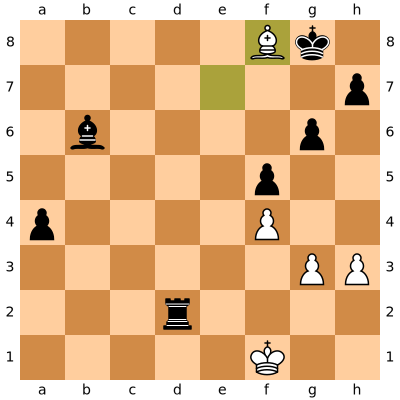

In [2029]:
fg = open('example.pgn')
fg = chess.pgn.read_game(fg)

board = chess.Board()
for move in fg.mainline_moves():
    board.push(move)
    
pose = 0
t0 = time.time()
_, picked = minimax(board, 1, board.turn, -float("Inf"), float("Inf"))
t1 = time.time()
print(t1-t0, "seconds required")
print("With", picked, "the centipawn advantage is", _)
board.push(picked)
print(pose, "positions analyzed")
board

# Preparing the Game

In [2030]:
def who():
    color = input("What color would you like to be?\n")
    color = color.lower()
    if color == 'white':
        turn = True
    elif color == 'black':
        turn = False

    return turn, turn

In [2031]:
def make_movement():
    movement = input("Make your move, SAN notation please\n")
    board.push_san(movement)
    return movement

# Minimax

In [2032]:
from functools import lru_cache
borrs = {}

def minimax(board, depth, maximizing_player, alpha, beta): #table is board
    global pose
    children = list(board.legal_moves) #find all possible moves from certain position

    if depth == 0 or board.is_game_over(): #don't go deeper if game over/depth ended
        return evaluate_board(board), None #calc-eval finds piece-values on board and adds them up. e.g. two pawns would be 2 points

    if maximizing_player == True:
        best_value = -float("Inf")
    else:
        print('it is black')
        best_value = float("Inf")
        
    random.shuffle(children) #MUST shuffle to prevent same move from happening over and over again each game

    for child in children:
        pose += 1
        board.push(child) #copy board and change it by moving the child move
        new_val = minimax(board, depth - 1, not maximizing_player, alpha, beta)[0] #recursively find value
        board.pop()
        if maximizing_player == True and new_val > best_value:
            best_value = new_val
            best_move = child
            alpha = max(alpha, best_value)
        if maximizing_player == False and new_val < best_value:
            best_value = new_val
            best_move = child
            beta = min(beta, best_value)
        if alpha > beta:
            break

    return best_value, best_move

### Implementing Hashing

We will use a random hash number for each position on the board, and put that in a dictionary with the corresponding depth and calc_eval.

In [2033]:
import chess.polyglot

board = chess.Board()
chess.polyglot.zobrist_hash(board = board)

5060803636482931868

Below we see how *efficient* the functions are. How many operations can be performed per second.

In [2034]:
board = chess.Board()
t0 = time.time()
board.push_san('e2e4')
calc_eval(board)
t1 = time.time()
board.pop()
print(1/(t1-t0))

3068.2545720555963


Below, we are trying to prove that our minimax function is indeed analyzing every possible move. After running, we can see that it is (keep in mind that `positions_evaluated` will count the first 20 as well as the second 400, otherwise it would be only 8000 after 3.

In [2035]:
def running(): #will need to modify this for pruned decision-tree making -> consult codecademy
    moves = list(board.legal_moves) #just using it rn for putting random bot vs smart bot
    chosen = random.randint(0, len(moves)-1) #form tree here, choose best option -> very simple with sklearn
    board.push_san(board.san(moves[chosen]))
    return moves[chosen]

In [2036]:
def display_board():
    return board._repr_svg_()

# Game Styles

In [2037]:
def two_humans(pause = 0.1, visual = 'svg'):  #see above
    use_svg = (visual == "svg")
    
    color = 'white'
        
    board_stop = display_board()
    html = "<center><b>Move %s Player %s, Plays '%s':</b><center/><br/>%s" % (
                           len(board.move_stack), color, "Nothing Yet", board_stop)
        
    if visual is not None:
            if visual == "svg":
                clear_output(wait=True)
            display(HTML(html))
            if visual == "svg":
                time.sleep(pause)
        
    while evaluate() not in enders:
        picked = make_movement()
        board_stop = display_board()
        
        if len(board.move_stack)%2 == 0:
            color = 'white'
        else:
            color = 'black'
        
        html = "<center><b>Move %s Player %s, Plays '%s':</b><center/><br/>%s" % (
                       len(board.move_stack), color, picked, board_stop)
        
        if visual is not None:
            if visual == "svg":
                clear_output(wait=True)
            display(HTML(html))
            if visual == "svg":
                time.sleep(pause)
    print('Reason for end of game is: ', evaluate())
    return board

In [2038]:
def human(pause = 0.1, visual = 'svg'):
    use_svg = (visual == "svg")
    turn, other_turn = who()
    if turn == True:
        color = 'black'
    elif turn == False:
        color = 'white'
    
        
    board_stop = display_board()
    html = "<center><b>Move %s Player %s, Plays '%s':</b><center/><br/>%s" % (
                           len(board.move_stack), color, "Nothing Yet", board_stop)
        
    if visual is not None:
            if visual == "svg":
                clear_output(wait=True)
            display(HTML(html))
            if visual == "svg":
                time.sleep(pause)
        
    while evaluate() not in enders:
        if color == 'white':
            color = 'black'
        else:
            color = 'white'
        
        if other_turn == True:
            picked = make_movement()
            board_stop = display_board()
            other_turn = False
            html = "<center><b>Move %s Player %s, Plays '%s':</b><center/><br/>%s" % (
                           len(board.move_stack), color, picked, board_stop)
            
        elif other_turn == False:
            _, picked = minimax(board, 2, board.turn, -float("Inf"), float("Inf"))
            print(evaluate_board(board))
            time.sleep(1)
            board.push(picked)
            board_stop = display_board()
            other_turn = True
            html = "<center><b>Move %s Player %s, Play '%s':</b><center/><br/>%s" % (
                           len(board.move_stack), color, picked, board_stop)
            
        if visual is not None:
            if visual == "svg":
                clear_output(wait=True)
            display(HTML(html))
            if visual == "svg":
                time.sleep(pause)
    print('Reason for end of game is: ', evaluate())
    return board

In [2039]:
def two_computers(pause = 0.1, visual = 'svg'):
    use_svg = (visual == "svg")
    
    color = None
            
    while evaluate() not in enders:
        if len(board.move_stack)%2 == 0:
            color = 'white'
        else:
            color = 'black'
            
        if color == 'white':
            _, picked = minimax(board, 4, board.turn, -float("Inf"), float("Inf")) #one smart computer
            board.push(picked)
        else:
            _, picked = minimax(board, 2, board.turn, -float("Inf"), float("Inf"))
            board.push(picked)
            
        board_stop = display_board()
        html = "<center><b>Move %s Round %s Player %s, Plays '%s':</b><center/><br/>%s" % (
                       len(board.move_stack), int(len(board.move_stack)/2), color, picked, board_stop)
            
        if visual is not None:
            if visual == "svg":
                clear_output(wait=True)
            display(HTML(html))
            if visual == "svg":
                time.sleep(pause)
    print('Reason for end of game is: ', evaluate())
    return board

# Running the Game

In [2040]:
def play_game(query, pause = 1, visual = 'svg'):
    use_svg = (visual == "svg")
              
    if query == 'human':
        board = human()
    elif query == 'two computers':
        board = two_computers()
    elif query == 'two humans':
        board = two_humans()

In [2041]:
def main():
    choice = input('Available playing options:\n- human\n- two humans\n- two computers\n')
    play_game(choice)

In [ ]:
main()

## To Do

1. Add more centipawn possibilities to prevent enormous alpha-beta tree search
2. Put human player functions to separate files
3. Attempt ML engine
4. At the maximum search depth the search needs to be extended by searching all capture moves, the so called [quiescence search](https://www.chessprogramming.org/Quiescence_Search) to avoid the ["Horizon Effect"](https://www.chessprogramming.org/Horizon_Effect).
5. When pushing minimax move, return tree to show what the predicted possibilities after were

## Issues

*If I have an idea on how to solve it, it will be a subpoint*

- Can't run statistics due to unknown repetition error
- Min-max is sloo-oow. Can only run approx. 2.5k games/sec
    - Add opening reportoire
    - Add rewards for better pawn structure, double-bishops, etc.
    - **Will make slower**: Quiesce

## Solved 
- When playing human, WRONG COLORS!!!! **Assigned black as start**
- Assign better centi-pawn values based on position of pawns **Used medium array with pos. values**
- Smart computer seems to repeat moves **Randomly shuffle children**
- Increased depth using alpha-beta pruning to minimize processing power **not much better**
- Smart computer will **not** take something, even if it is advantageous, if it means the piece will be sacrificed **Because we are not doing depth-ply but depth-half-move, we need to make sure that the depth is even.**
- Increase depth using min-max **Wrote min-max function**